We nned to create: 
1/a 2D array to represent the states in the environment (done)
2/a q-table dictionary for each of the state, filed with uniformly distributed values between 110-120 (done)
3/a loop that gives -1 reward for each step taken, and -30 reward when in the hole region, and +100 reward when reaching the goal
4/the action of the agent + the randomness of the action
5/an agent that starts from state 1, and stops at state 25, then starts a new iteration. 1000 iterations are performed.


{1: [89.09470720602224, 110.71339487816583, 59.77759074054193, 113.59716476661568], 2: [57.98073760490873, 115.80406959539648, 59.46840981349217, -23.801018940998794], 3: [60.72056587944573, 111.0253540483832, 43.74986849701465, 30.990331552441894], 4: [51.834490904322784, 111.7235121193005, -910.1035866664962, -1294.7203689970916], 5: [-264.4486861326075, 114.28621510134981, 112.68948536440011, -1033.628097268522], 6: [90.23971431126513, -1262.4239749545577, -970.8142696410308, 114.33963204778985], 7: [81.69990384919775, -711.8542794618284, -1700.8973990360137, -1516.6178902111517], 8: [62.008956293707044, -224.970350181332, -58.99497714976229, -124.80008401502684], 9: [-1110.094007903163, -677.8926240843089, -631.0182909565733, 59.95801713287709], 10: [-491.06678106292566, -262.58518365841553, 118.39006583096344, -535.072031720182], 11: [91.95076757418286, -909.0448160139766, -533.8515945493606, 111.64821345299964], 12: [-1181.6504045814397, -561.7079971402612, -1097.121082149941, 87

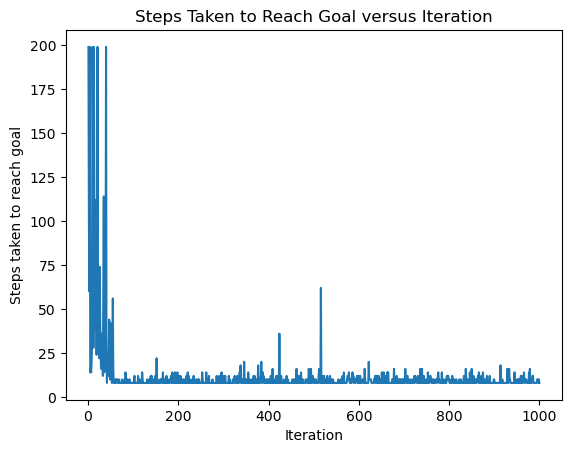

In [ ]:
#1/a 2D array to represent the states in the environment (done)
environment = [(25,24,23,22,21),
(20,19,18,17,16),
(15,14,13,12,11),
(10,9,8,7,6),
(5,4,3,2,1)]

#2/a q-table dictionary for each of the state, filed with uniformly distributed values between 110-120
import random
states = list(range(1, 25, 1))
#generate a list of 4 uniformly distributed random values between 110 and 120
q_table = {
    state: [random.uniform(110, 120) for _ in range(4)]
    for state in states
}


#3/a loop that gives -1 reward for each step taken, and -30 reward when in the hole region, and +100 reward when reaching the goal
direction = [5,-5,1,-1] #up, down, left, right
S0 = 1 #initial position
idle_state = S0;

step_memory = {}

#4/the action of the agent + the randomness of the action
def decision(start_state):
    if start_state == 1:
        options = [q_table[start_state][i] for i in [0,2]]    
    elif start_state == 5:
        options = [q_table[start_state][i] for i in [0,3]]
    elif start_state == 21:
        options = [q_table[start_state][i] for i in [1,2]]
    elif start_state in (6,11,16):
        options = [q_table[start_state][i] for i in [0,1,2]]
    elif start_state in (2,3,4):
        options = [q_table[start_state][i] for i in [0,2,3]]
    elif start_state in (10,15,20):
        options = [q_table[start_state][i] for i in [0,1,3]]
    elif start_state in (22,23,24):
        options = [q_table[start_state][i] for i in [1,2,3]]
    else:
        options = [q_table[start_state][i] for i in [0,1,2,3]]
    
    if random.random() <0.9:
        return q_table[start_state].index(max(options))
    else:
        return q_table[start_state].index(random.choice(options))



graph_step = []
graph_iteration = list(range(1,1001))

#5/an agent that starts from state 1, and stops at state 25, then starts a new iteration. 1000 iterations are performed.
for iteration in range(1000):
    idle_state = 1
    step_memory = {}
    step = 1
    while idle_state < 25:
        if step < 200:
            start_state = idle_state
            movement = decision(start_state)
            idle_state = idle_state + direction[movement]
            step_memory[step] = [idle_state,start_state, movement]
            step = step + 1
        else:
            break
    
    sequence = list(reversed(list(step_memory.items())))
    expected_cumulative_reward = 0
    cumulative_reward = 0
    overstep_penalty = -10

    for i in sequence: 
        if i[1][0] == 25:
            action_reward = 99
        elif i[1][0] in (13,14,18,19) and i[1][1] not in (13,14,18,19):
            action_reward = -31
        else:
            action_reward = -1
            
        expected_cumulative_reward = cumulative_reward

        if i[0] <20:
            cumulative_reward = action_reward + expected_cumulative_reward
        else:
            cumulative_reward = action_reward + expected_cumulative_reward + overstep_penalty

        q_table[i[1][1]][i[1][2]] = q_table[i[1][1]][i[1][2]]*0.9 + cumulative_reward*0.1
    
    graph_step.append(list(step_memory.keys())[-1])

import matplotlib.pyplot as plt
plt.plot(graph_iteration, graph_step)
plt.xlabel("Iteration")
plt.ylabel("Steps taken to reach goal")
plt.title("Steps Taken to Reach Goal versus Iteration")
plt.show
    
    
print(q_table)
print(f"Final Steps taken: {list(step_memory.keys())[-1]}\nFinal Path taken: {[value[0] for value in step_memory.values()]}")


{1: [-425.4182099303657, 113.94056423174752, 61.99970354957145, 114.35456193651773], 2: [-424.5698315126233, 118.91790699881038, 62.99970358358446, -80.31066936209845], 3: [-53.979597247851906, 110.03716622429572, 63.999705392437015, -126.61075776158766], 4: [64.99970617919647, 117.09021150085245, -87.45902432148108, 17.850743882532623], 5: [-33.347503666226146, 111.11314451197154, 115.19344861595812, -965.4386226845794], 6: [-1110.1192545675071, -630.9146614534263, -1903.371564152881, 114.07885005546163], 7: [-1246.386835743963, -487.98271830664993, -811.5863739968172, -1896.4528150903925], 8: [-735.8150818461978, 32.17442798317402, -1605.7285929643667, -1234.3650308733293], 9: [65.99998295404572, 6.575360128107763, -82.20227016106294, -412.49581482496404], 10: [63.370998223398615, -739.7144049366059, 119.33796962397584, -530.9702123147167], 11: [-789.6519425437225, -1260.689793856637, -786.0026437773641, 115.76221864832453], 12: [-822.0674039423526, -1803.4879197874388, -2153.0639384

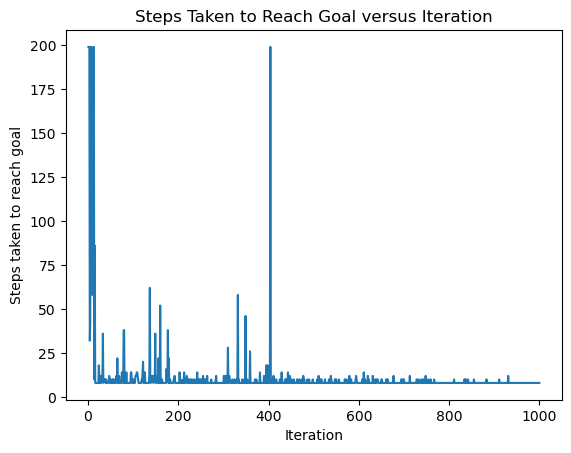

In [2]:
#Now we want to try a modified version where the agent's decision is not fixed at 90% determinant, 10% random, 
# but rather less and less random over iterations
#In this version, the function decision has one more parameter: iteration

#1/a 2D array to represent the states in the environment (done)
environment = [(25,24,23,22,21),
(20,19,18,17,16),
(15,14,13,12,11),
(10,9,8,7,6),
(5,4,3,2,1)]

#2/a q-table dictionary for each of the state, filed with uniformly distributed values between 110-120
import random
states = list(range(1, 25, 1))
#generate a list of 4 uniformly distributed random values between 110 and 120
q_table = {
    state: [random.uniform(110, 120) for _ in range(4)]
    for state in states
}


#3/a loop that gives -1 reward for each step taken, and -30 reward when in the hole region, and +100 reward when reaching the goal
direction = [5,-5,1,-1] #up, down, left, right
S0 = 1 #initial position
idle_state = S0;

step_memory = {}

def decision(start_state, iteration):
    if start_state == 1:
        options = [q_table[start_state][i] for i in [0,2]]    
    elif start_state == 5:
        options = [q_table[start_state][i] for i in [0,3]]
    elif start_state == 21:
        options = [q_table[start_state][i] for i in [1,2]]
    elif start_state in (6,11,16):
        options = [q_table[start_state][i] for i in [0,1,2]]
    elif start_state in (2,3,4):
        options = [q_table[start_state][i] for i in [0,2,3]]
    elif start_state in (10,15,20):
        options = [q_table[start_state][i] for i in [0,1,3]]
    elif start_state in (22,23,24):
        options = [q_table[start_state][i] for i in [1,2,3]]
    else:
        options = [q_table[start_state][i] for i in [0,1,2,3]]
    
    determination = 0.9 + iteration*(1/1000)*0.1
    if random.random() < determination:
        return q_table[start_state].index(max(options))
    else:
        return q_table[start_state].index(random.choice(options))

graph_step = []
graph_iteration = list(range(1,1001))
iteration = 1

for iteration in range(1000):
    idle_state = 1
    step_memory = {}
    step = 1
    while idle_state < 25:
        if step < 200:
            start_state = idle_state
            movement = decision(start_state,iteration)
            idle_state = idle_state + direction[movement]
            step_memory[step] = [idle_state,start_state, movement]
            step = step + 1
        else:
            break
    
    sequence = list(reversed(list(step_memory.items())))
    expected_cumulative_reward = 0
    cumulative_reward = 0
    overstep_penalty = -10

    for i in sequence: 
        if i[1][0] == 25:
            action_reward = 99
        elif i[1][0] in (13,14,18,19) and i[1][1] not in (13,14,18,19):
            action_reward = -31
        else:
            action_reward = -1
            
        expected_cumulative_reward = cumulative_reward

        if i[0] <20:
            cumulative_reward = action_reward + expected_cumulative_reward
        else:
            cumulative_reward = action_reward + expected_cumulative_reward + overstep_penalty

        q_table[i[1][1]][i[1][2]] = q_table[i[1][1]][i[1][2]]*0.9 + cumulative_reward*0.1
    
    graph_step.append(list(step_memory.keys())[-1])
    iteration = iteration + 1

import matplotlib.pyplot as plt
plt.plot(graph_iteration, graph_step)
plt.xlabel("Iteration")
plt.ylabel("Steps taken to reach goal")
plt.title("Steps Taken to Reach Goal versus Iteration")
plt.show
    
    
print(q_table)
print(f"Final Steps taken: {list(step_memory.keys())[-1]}\nFinal Path taken: {[value[0] for value in step_memory.values()]}")

The remaining problem is that the agent still steps into the hole after 1000 iterations. This does not meet out goal of maximising rewards. Maybe an algorithm has been neglected which defines the desire to maximise rewards?